In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.autograd import Variable


import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
seed = 42
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [3]:
batch_size = 128
epochs = 5
learning_rate = 1e-3

In [4]:
# prepare dataset and transformation to model
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(
    root = "~/torch_datasets", train= True, transform= transform, download=True)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True
)

In [7]:
class AE2D(nn.Module):
    def __init__(self):
        super(AE2D, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3, stride=3, padding= 1),
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2),
            nn.Conv2d(16, 8, 3, stride=2, padding= 1),
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=1)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, 3, stride=2),
            nn.ReLU(True), 
            nn.ConvTranspose2d(16, 8, 5, stride=3, padding=1),
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 2, stride= 2, padding=1),
            nn.Tanh()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [8]:
model = AE2D().cuda()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)

In [27]:
for epoch in range(50):
    loss = 0
    for batch_features in train_loader:
        data, _  = batch_features
        data = Variable(data).cuda()
        optimizer.zero_grad()
        outputs = model(data)
        train_loss = criterion(outputs, data)
        train_loss.backward()
        optimizer.step()
        loss += train_loss.item()
    loss = loss/len(train_loader)
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch+1, epochs, loss))

epoch [1/5], loss:0.0329
epoch [2/5], loss:0.0323
epoch [3/5], loss:0.0318
epoch [4/5], loss:0.0314
epoch [5/5], loss:0.0311
epoch [6/5], loss:0.0308
epoch [7/5], loss:0.0306
epoch [8/5], loss:0.0304
epoch [9/5], loss:0.0302
epoch [10/5], loss:0.0300
epoch [11/5], loss:0.0299
epoch [12/5], loss:0.0297
epoch [13/5], loss:0.0296
epoch [14/5], loss:0.0295
epoch [15/5], loss:0.0293
epoch [16/5], loss:0.0292
epoch [17/5], loss:0.0291
epoch [18/5], loss:0.0290
epoch [19/5], loss:0.0289
epoch [20/5], loss:0.0289
epoch [21/5], loss:0.0288
epoch [22/5], loss:0.0287
epoch [23/5], loss:0.0287
epoch [24/5], loss:0.0286
epoch [25/5], loss:0.0285
epoch [26/5], loss:0.0285
epoch [27/5], loss:0.0284
epoch [28/5], loss:0.0284
epoch [29/5], loss:0.0283
epoch [30/5], loss:0.0283
epoch [31/5], loss:0.0282
epoch [32/5], loss:0.0282
epoch [33/5], loss:0.0281
epoch [34/5], loss:0.0281
epoch [35/5], loss:0.0280
epoch [36/5], loss:0.0280
epoch [37/5], loss:0.0280
epoch [38/5], loss:0.0279
epoch [39/5], loss:0.

In [28]:
test_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=False, transform=transform, download=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=10, shuffle=False
)

test_examples = None

with torch.no_grad():
    for batch_features in test_loader:
        batch_features = batch_features[0]
        test_examples = batch_features.cuda()
        reconstruction = model(test_examples)
        break

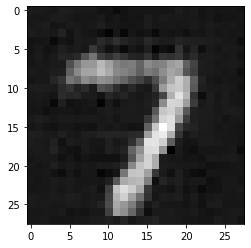

In [29]:
plt.imshow(reconstruction[0].reshape(28,28).cpu(), cmap='gray')
plt.show()

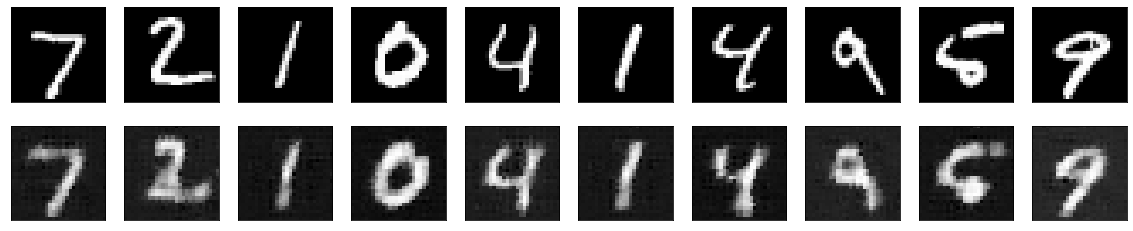

In [30]:
with torch.no_grad():
    number = 10
    plt.figure(figsize=(20,4))

    for index in range(number):
        ax = plt.subplot(2, number, index + 1)
        plt.imshow(test_examples[index].cpu().numpy().reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, number, index + 1 + number)
        plt.imshow(reconstruction[index].cpu().numpy().reshape(28,28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()